## COMP411/511  HW3
### Deadline: 22 December 2024, 23.59 

You have **TODOs** in this code. They are all marked with `TODO` in comments.  
Your task is to fill them in with the correct code. Do **not** change any other code.  

You also have some questions to answer. They are marked with `QA` as markdown cells.  

---

## Parts:

### **1: Classification on CIFAR**
1.1: **Simple CNN** *(10 pts)*  
1.2: **Deeper CNN** *(10 pts)*  
1.3: **Regularized Deeper CNN** *(10 pts)*  
1.4: **QA** *(5 pts)*  

---

### **2: Semantic Segmentation on Pascal VOC**
2.1.1: **Preprocess Pascal VOC** *(5 pts)*  
2.1.2: **QA** *(5 pts)*  
2.2: **Pretrained FCN** *(20 pts)*  
2.3: **QA** *(15 pts)*  
2.4: **Training the FCN** *(20 pts)*  

---

### **Total: 100 points**

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import matplotlib.pyplot as plt
import numpy as np

## Part 1: Classification on CIFAR

In [2]:
NUM_TRAIN = 49000
transform = T.Compose([T.ToTensor(), T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar10_train = dset.CIFAR10('./datasets', train=True, download=True, transform=transform)
loader_train = DataLoader(cifar10_train, batch_size=64, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

cifar10_val = dset.CIFAR10('./datasets', train=True, download=True, transform=transform)
loader_val = DataLoader(cifar10_val, batch_size=64, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:18<00:00, 9098914.15it/s]


Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified


In [7]:
def check_accuracy_and_loss(loader, model, device): 
    acc = 0
    total_loss = 0
    model.eval()
    num_correct = 0
    num_samples = 0
    total_loss = 0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)

            scores = model(x)
            loss = criterion(scores, y)
            total_loss += loss
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
    acc = num_correct / num_samples
    total_loss /= len(loader)
    return acc, total_loss

# Part 1.1: Simple CNN (10 pts)

In [ ]:
# TODO: Define a simple CNN with the following architecture:
#
# Conv(kernel=(3, 3), stride=1, padding=1, input_channel=3, output_channel=32)
# ReLU
# MaxPool(kernel=2, stride=2)
# Conv(kernel=(3, 3), stride=1, padding=1, input_channel=32, output_channel=64)
# ReLU
# MaxPool(kernel=2, stride=2)
# Flatten   
# Linear(input=64*8*8, output=10)

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # === TODO ===

        # === === ===

    def forward(self, x):
        # === TODO ===

        # === === ===
        return x

In [ ]:
# TODO: Train the model with 
#           Adam optimizer
#           Learning rate of 1e-3
#           Batch size of 64
#           10 epochs
#           Cross Entropy Loss
# Check train loss and train accuracy after each epoch, and validate accuracy after each epoch
# Store them, and plot them at the end
# Moreover, store losses and plot them at the end
# You should be easily able to achieve >65% accuracy on the validation set


lr = 1e-3
epochs = 10

model = SimpleCNN().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

train_accs = []
val_accs = []
train_losses = []
val_losses = []

for epoch in range(epochs):
    for x, y in loader_train:
        x = x.to(DEVICE)
        y = y.to(DEVICE)
        
        scores = model(x)
        loss = criterion(scores, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_acc, train_loss = check_accuracy_and_loss(loader_train, model, device=DEVICE)
    val_acc, val_loss = check_accuracy_and_loss(loader_val, model, device=DEVICE)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

plt.plot([i.cpu() for i in train_accs], label='Train Accuracy')
plt.plot([i.cpu() for i in val_accs], label='Validation Accuracy')
plt.title('Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot([i.cpu() for i in train_losses], label='Train Loss')
plt.plot([i.cpu() for i in val_losses], label='Validation Loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Part 1.2: Deeper CNN (10 pts)

In [19]:
# TODO: Now, implement a deeper CNN with the following architecture:
#
# Conv(kernel=(3, 3), stride=1, padding=1, input_channel=3, output_channel=32)
# ReLU
# Conv(kernel=(3, 3), stride=1, padding=1, input_channel=32, output_channel=32)
# ReLU
# MaxPool(kernel=2, stride=2)
# Conv(kernel=(3, 3), stride=1, padding=1, input_channel=32, output_channel=64)
# ReLU
# Conv(kernel=(3, 3), stride=1, padding=1, input_channel=64, output_channel=64)
# ReLU
# MaxPool(kernel=2, stride=2)
# Flatten
# Linear(input=64*8*8, output=128)


class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        # === TODO ===

        # === === ===

    def forward(self, x):
        # === TODO ===

        # === === ===
        return x



In [ ]:
# Train the model with the same configuration as before
# You should be easily able to achieve >70% accuracy on the validation set

lr = 1e-3
epochs = 10

model = DeepCNN().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

train_accs = []
val_accs = []
train_losses = []
val_losses = []

for epoch in range(epochs):
    for x, y in loader_train:
        x = x.to(DEVICE)
        y = y.to(DEVICE)
        
        scores = model(x)
        loss = criterion(scores, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_acc, train_loss = check_accuracy_and_loss(loader_train, model, device=DEVICE)
    val_acc, val_loss = check_accuracy_and_loss(loader_val, model, device=DEVICE)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

plt.plot([i.cpu() for i in train_accs], label='Train Accuracy')
plt.plot([i.cpu() for i in val_accs], label='Validation Accuracy')
plt.title('Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot([i.cpu() for i in train_losses], label='Train Loss')
plt.plot([i.cpu() for i in val_losses], label='Validation Loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Part 1.3: Regularized Deeper CNN (10 pts)

In [ ]:
# TODO: We observe an overfitting in the training and validation losses. The training loss is decreasing while the validation loss is increasing. This is a clear sign of overfitting.
#       In this part, your task is to solve this problem by adding dropout layers and batch normalization layers to each layer of the model.
#       You should add dropout and batch normalization layers to proper places (https://jmlr.org/papers/v15/srivastava14a.html)


class RegDeepCNN(nn.Module):
    def __init__(self):
        super(RegDeepCNN, self).__init__()
        # === TODO ===

        # === === ===

    def forward(self, x):
        # === TODO ===

        # === === ===
        return x

In [ ]:
# Train the model with the same configuration as before

lr = 1e-3
epochs = 10

model = RegDeepCNN().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

train_accs = []
val_accs = []
train_losses = []
val_losses = []

for epoch in range(epochs):
    for x, y in loader_train:
        x = x.to(DEVICE)
        y = y.to(DEVICE)
        
        scores = model(x)
        loss = criterion(scores, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_acc, train_loss = check_accuracy_and_loss(loader_train, model, device=DEVICE)
    val_acc, val_loss = check_accuracy_and_loss(loader_val, model, device=DEVICE)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

plt.plot([i.cpu() for i in train_accs], label='Train Accuracy')
plt.plot([i.cpu() for i in val_accs], label='Validation Accuracy')
plt.title('Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot([i.cpu() for i in train_losses], label='Train Loss')
plt.plot([i.cpu() for i in val_losses], label='Validation Loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Part 1.4: QA (5 pts)
Q1: Dit it solve overfitting? Explain why or why not. (3 pts)

A:

---

Q2: What else can you do to solve overfitting? 

Hint: One option could be a different kind of optimizer, check PyTorch documentation (2 pts)

A:

## Part 2: Semantic Segmentation on Pascal VOC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import sampler
import torchvision.transforms as T
import torchvision.transforms.functional as TF
from torchvision.datasets import VOCSegmentation
from torch.utils.data import DataLoader
from PIL import Image

## Part 2.1.1: Preprocess Pascal VOC (5 pts)

In [ ]:

# TODO: Define transformations for both image and mask
# Resize the image to 256x256 with interpolation mode with proper kind of interpolation
# Resize the mask to 256x256 with interpolation mode with proper kind of interpolation
# Convert the image to tensor
# Convert the mask to tensor

class SegmentationTransform:
    def __init__(self, size=(256, 256)):
        # === TODO ===
        self.image_transform = None
        # === === ===

        # === TODO ===
        self.mask_transform = None
        # === === ===

    def __call__(self, img, mask):
        img = self.image_transform(img)
        mask = self.mask_transform(mask).squeeze(0)  # Remove channel dim
        return img, mask
    
# Dataset with consistent transforms
transform = SegmentationTransform()

# Load Pascal VOC dataset
train_dataset = VOCSegmentation(
    root='./datasets',
    year='2012',
    image_set='train',
    download=True,
    transforms=transform
)

val_dataset = VOCSegmentation(
    root='./datasets',
    year='2012',
    image_set='val',
    download=True,
    transforms=transform
)

voc_classes = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

assert len(train_dataset) == 1464
assert len(val_dataset) == 1449
assert train_dataset[0][0].shape == (3, 256, 256)
assert train_dataset[0][1].shape == (256, 256)




# Part 2.1.2: QA (5 pts)

 Q: Which interpolation did you prefer for image and mask resizing? Can you use bilinear interpolation for masks?

 A:



## Part 2.2: Pretrained FCN (20 pts)

In [ ]:
# TODO: Segmentation can be considered as a pixel-wise classification problem. 
#       Fully Convolutional Network (https://arxiv.org/pdf/1411.4038) is a popular architecture for semantic segmentation, classifying each pixel in an image, to a class.
#       In this part, you are going to use pretrained Fully Convolutional Network (FCN) for semantic segmentation.
#       You can use the torchvision.models.segmentation.fcn_resnet50 model for this task, which is a FCN model with a ResNet-50 backbone.
#       You should use the pretrained weights of the model.
#       IMPORTANT: Tthe output of the model is a dictionary with key 'out' which contains the output of the model.
#
#       You should also implement the compute_mIoU function that computes the mIoU for a given model and dataloader.
#
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = torchvision.models.segmentation.fcn_resnet50(pretrained=True).requires_grad_(False).to(DEVICE)

# 10 pts
def compute_mIoU(model, dataloader, num_classes=21):
    # === TODO ===

    # === === ===
    return miou


val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=4)
miou = compute_mIoU(model, val_loader, num_classes=21)

# You should be able to achieve mIoU ~0.72 with the pretrained model
print(f'mIoU: {miou:.4f}')

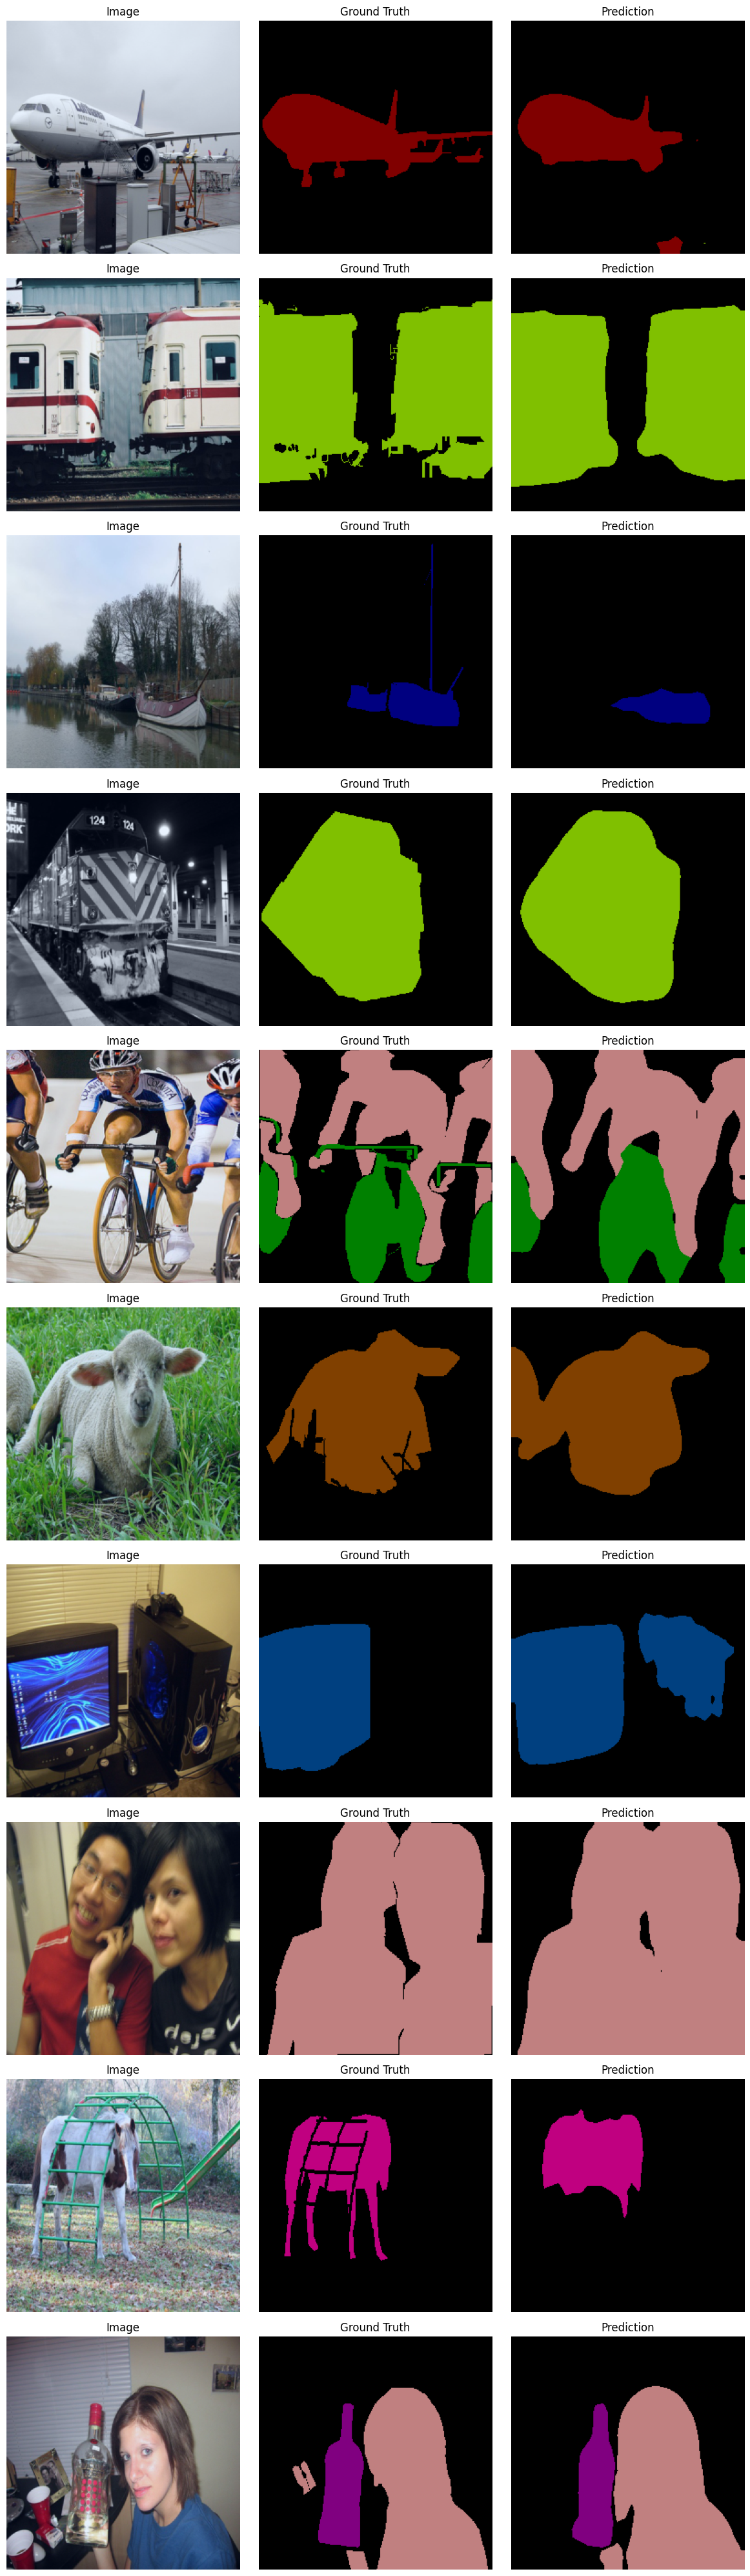

In [ ]:
# TODO: Now, provided class to color mapping below, you should visualize the predictions of the model on the validation set.
#       For your convenience, the VOC color map is provided below.
#       You should display 10 images with their original, ground truth, and predicted images side by side. The output should be similar to the example below.


VOC_COLORMAP = [
    [0, 0, 0],
    [128, 0, 0],
    [0, 128, 0],
    [128, 128, 0],
    [0, 0, 128],
    [128, 0, 128],
    [0, 128, 128],
    [128, 128, 128],
    [64, 0, 0],
    [192, 0, 0],
    [64, 128, 0],
    [192, 128, 0],
    [64, 0, 128],
    [192, 0, 128],
    [64, 128, 128],
    [192, 128, 128],
    [0, 64, 0],
    [128, 64, 0],
    [0, 192, 0],
    [128, 192, 0],
    [0, 64, 128],
]


# 10 pts
def visualize_predictions_with_voc_colors(model, dataloader, num_images, num_classes=21):
    # === TODO ===
    
    # === === ===

visualize_predictions_with_voc_colors(model, val_loader, num_images=10)

# Part 2.3: QA (15 pts)
Read the "Fully Convolutional Networks for Semantic Segmentation" paper (https://arxiv.org/abs/1411.4038) in detail, and answer the following questions:

Q: How does the “skip architecture” improve semantic segmentation results compared to the baseline FCN models?

A: 

---

Q: What are the trade-offs between the “shift-and-stitch” method and in-network upsampling for producing dense predictions?

A:

---

Q: Why does the paper emphasize fine-tuning pre-trained classification networks for semantic segmentation instead of training from scratch?

A:

---

Q: Explain the rationale and implementation of “deconvolution layers” for upsampling in the context of the FCN architecture.

A:

---

Q: How does the combination of in-network upsampling and skip connections balance the inherent trade-off between semantic abstraction and spatial precision in fully convolutional networks?

A:


## Part 2.4: Training the FCN (20 pts)

In [ ]:
# TODO: Now, you are going to train the model on the Pascal VOC dataset from scratch, using the same architecture as before.
#    You should set the pretrained weights of the model to False. The rest of the configuration should be the same.
#    You should set the training configuration by experimenting with different hyperparameters.
#    You should set the batch size, learning rate, optimizer, scheduler, and loss function.
#    Note that, you need to use the CrossEntropyLoss for this task, and ignore the index 255 in the loss calculation. Index 255 represents the 'none' class in the dataset.
#    However, DO NOT train the model for more than 20 epochs.
#    Below, we provided the training procedure outputs for a training of 20 epochs.
#    You should plot the training loss and validation mIoU at the end.
#    You should also visualize the predictions of the model on 6 images from the validation set for every epochs, to observe the training progress.
#    After training, you should be able to achieve a validation mIoU of >0.50.

# === TODO ===
epochs = None
batch_size = None
# ...
# === === ===

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)



train_losses = []
val_mious = []

for epoch in range(epochs):
    # === TODO ===

    # === === ===


epochs = len(train_losses)
plt.figure(figsize=(12, 5))

# Plot Train Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot Validation mIoU
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), val_mious, label='Validation mIoU', color='orange')
plt.xlabel('Epoch')
plt.ylabel('mIoU')
plt.title('Validation mIoU')
plt.legend()

plt.tight_layout()
plt.show()

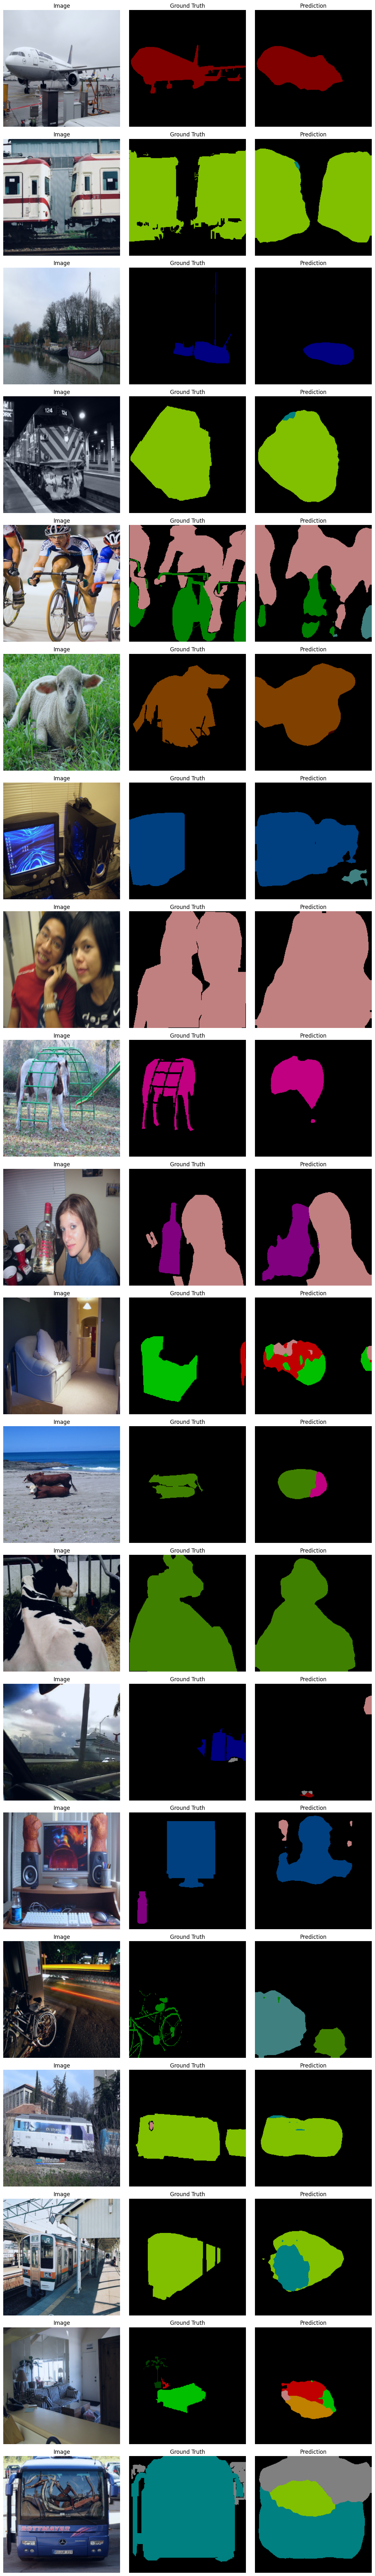

In [20]:
# Now, display 20 images from the validation set with their original, ground truth, and predicted images side by side, using the trained model.
visualize_predictions_with_voc_colors(model, val_loader, num_images=20)